In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
production = pd.read_csv(r"C:\Users\adamr\Documents\project\Deployment-flask-master\project\time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | s.startswith('DE')),
                        parse_dates=[0], index_col=0)

In [4]:
production.tail(3)


,DE_load_actual_entsoe_power_statistics,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,...,DE_tennet_wind_generation_forecast,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_solar_generation_forecast,DE_transnetbw_wind_generation_actual,DE_transnetbw_wind_generation_forecast,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2019-04-30 21:00:00+00:00,NaN,47886.0,47561.0,NaN,NaN,NaN,NaN,NaN,8414.0,NaN,...,3025.0,1227.0,3029.0,5800.0,5933.0,NaN,NaN,61.0,94.0,61.0
2019-04-30 22:00:00+00:00,NaN,44594.0,41060.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5395.0,4416.0,NaN,NaN,NaN,NaN,NaN
2019-04-30 23:00:00+00:00,NaN,42599.0,39328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5147.0,4236.0,NaN,NaN,NaN,NaN,NaN


In [5]:
production = production.loc[production.index.year == 2016, :]


In [6]:
production.head(3)


,DE_load_actual_entsoe_power_statistics,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,...,DE_tennet_wind_generation_forecast,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_solar_generation_forecast,DE_transnetbw_wind_generation_actual,DE_transnetbw_wind_generation_forecast,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,42768.2041,39396.0,38163.0,22.39,39159.0,0.0,0.0,43663.0,8579.0,0.1965,...,4740.0,2263.0,3352.0,4652.0,3892.0,0.0,0.0,24.0,0.0,24.0
2016-01-01 01:00:00+00:00,41154.1122,37718.0,36769.0,20.59,39159.0,0.0,0.0,43663.0,8542.0,0.1957,...,4735.0,2218.0,3280.0,4431.0,3705.0,0.0,0.0,24.0,0.0,24.0
2016-01-01 02:00:00+00:00,39961.7143,36692.0,36452.0,16.81,39159.0,0.0,0.0,43663.0,8443.0,0.1934,...,4795.0,2005.0,3434.0,4325.0,3678.0,0.0,0.0,17.0,0.0,17.0


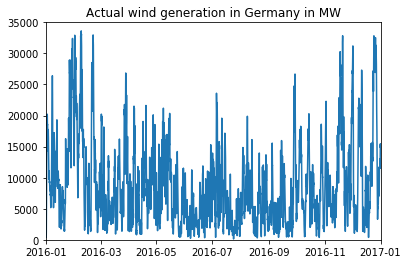

In [9]:
plt.plot(production.index, production['DE_wind_generation_actual'])
plt.title('Actual wind generation in Germany in MW')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 35000)

# save plot
plt.savefig(r"C:\Users\adamr\Documents\project\wind.png", dpi=200)

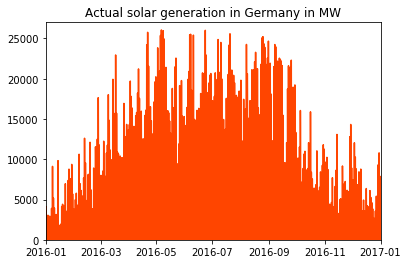

In [11]:
plt.plot(production.index, production['DE_solar_generation_actual'], c='OrangeRed')
plt.title('Actual solar generation in Germany in MW')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 27000)

# save plot
plt.savefig(r"C:\Users\adamr\Documents\project\solar.png", dpi=200)

In [12]:
production_wind_solar = production[['DE_wind_generation_actual', 'DE_solar_generation_actual']]


In [13]:
weather = pd.read_csv(r"C:\Users\adamr\Documents\project\Deployment-flask-master\project\weather_data_GER_2016.csv",
                     parse_dates=[0], index_col=0)

In [15]:
weather.head(3)


,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,0,47.5,5.625,0.81,1.88,3.36,2,10,0.052526,0.0,0.0,277.350159,1.236413,99282.710938
2016-01-01 01:00:00+00:00,1,47.5,5.625,0.77,1.61,2.63,2,10,0.052510,0.0,0.0,277.025665,1.239390,99300.164062
2016-01-01 02:00:00+00:00,2,47.5,5.625,0.66,1.22,1.89,2,10,0.052495,0.0,0.0,277.223755,1.243861,99310.992188


In [16]:
weather.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2248704 entries, 2016-01-01 00:00:00+00:00 to 2016-12-31 23:00:00+00:00
Data columns (total 14 columns):
cumulated hours    int64
lat                float64
lon                float64
v1                 float64
v2                 float64
v_50m              float64
h1                 int64
h2                 int64
z0                 float64
SWTDN              float64
SWGDN              float64
T                  float64
rho                float64
p                  float64
dtypes: float64(11), int64(3)
memory usage: 257.3 MB


In [17]:
weather.loc[weather.index == '2016-01-01 00:00:00', :]


,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,0,47.5,5.625,0.81,1.88,3.36,2,10,0.052526,0.0,0.0,277.350159,1.236413,99282.710938
2016-01-01 00:00:00+00:00,0,47.5,6.250,0.85,1.77,3.69,2,10,0.163823,0.0,0.0,277.609924,1.226037,98194.710938
2016-01-01 00:00:00+00:00,0,47.5,6.875,0.94,1.94,3.79,3,11,0.286626,0.0,0.0,276.850159,1.205101,96186.710938
2016-01-01 00:00:00+00:00,0,47.5,7.500,0.84,1.68,2.82,2,10,0.109472,0.0,0.0,276.414612,1.200341,95874.710938
2016-01-01 00:00:00+00:00,0,47.5,8.125,0.74,1.56,2.51,2,10,0.066503,0.0,0.0,276.039612,1.202233,96050.710938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01 00:00:00+00:00,0,55.0,12.500,3.71,4.36,5.06,2,10,0.006501,0.0,0.0,277.781799,1.280602,102218.710938
2016-01-01 00:00:00+00:00,0,55.0,13.125,3.82,4.34,4.69,2,10,0.002311,0.0,0.0,277.668518,1.283288,102282.710938
2016-01-01 00:00:00+00:00,0,55.0,13.750,3.75,4.23,4.61,2,10,0.003382,0.0,0.0,276.957581,1.287438,102290.710938


In [18]:
weather_by_day = weather.groupby(weather.index).mean()


In [19]:
weather_by_day.head(24)


,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,0.0,51.25,10.3125,2.616758,3.714414,5.132500,2.546875,10.546875,0.164370,0.000000,0.000000,275.296747,1.253185,99281.007812
2016-01-01 01:00:00+00:00,1.0,51.25,10.3125,2.564375,3.631055,4.976094,2.546875,10.546875,0.164331,0.000000,0.000000,275.255473,1.253778,99288.492188
2016-01-01 02:00:00+00:00,2.0,51.25,10.3125,2.480859,3.516328,4.794688,2.546875,10.546875,0.164288,0.000000,0.000000,275.217089,1.254304,99296.398438
2016-01-01 03:00:00+00:00,3.0,51.25,10.3125,2.397148,3.404961,4.664023,2.546875,10.546875,0.164239,0.000000,0.000000,275.211715,1.254562,99306.695312
2016-01-01 04:00:00+00:00,4.0,51.25,10.3125,2.305703,3.286602,4.566289,2.546875,10.546875,0.164199,0.000000,0.000000,275.193369,1.254733,99319.750000
2016-01-01 05:00:00+00:00,5.0,51.25,10.3125,2.207227,3.160312,4.445078,2.546875,10.546875,0.164153,0.000000,0.000000,275.184228,1.254969,99336.710938
2016-01-01 06:00:00+00:00,6.0,51.25,10.3125,2.099336,3.027148,4.291758,2.546875,10.546875,0.164116,0.029503,0.002406,275.151314,1.255247,99357.078125
2016-01-01 07:00:00+00:00,7.0,51.25,10.3125,2.001992,2.903750,4.116836,2.542969,10.542969,0.164068,32.701265,4.885147,275.175961,1.255487,99383.765625
2016-01-01 08:00:00+00:00,8.0,51.25,10.3125,2.061836,2.915977,3.855273,2.542969,10.542969,0.164031,167.523132,34.330536,275.612767,1.255295,99415.406250


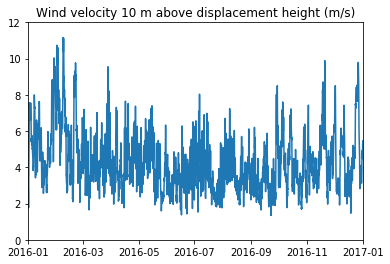

In [20]:
plt.plot(weather_by_day.index, weather_by_day['v2'])
plt.title('Wind velocity 10 m above displacement height (m/s)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 12)

# save plot
plt.savefig(r"C:\Users\adamr\Documents\project\v1.png", dpi=200)

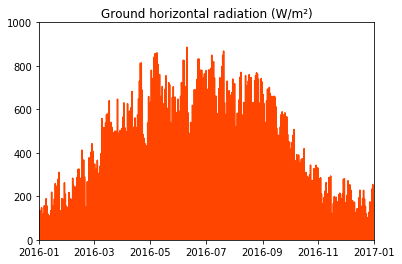

In [21]:
plt.plot(weather_by_day.index, weather_by_day['SWGDN'], c='OrangeRed')
plt.title('Ground horizontal radiation (W/m²)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 1000)

# save plot
plt.savefig(r"C:\Users\adamr\Documents\project\radiation.png", dpi=200)

In [23]:
# merge production_wind_solar and weather_by_day DataFrames
combined = pd.merge(production_wind_solar, weather_by_day, how='left', left_index=True, right_index=True)


In [24]:
combined.head()


,DE_wind_generation_actual,DE_solar_generation_actual,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
utc_timestamp,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,8579.0,0.0,0.0,51.25,10.3125,2.616758,3.714414,5.132500,2.546875,10.546875,0.164370,0.0,0.0,275.296747,1.253185,99281.007812
2016-01-01 01:00:00+00:00,8542.0,0.0,1.0,51.25,10.3125,2.564375,3.631055,4.976094,2.546875,10.546875,0.164331,0.0,0.0,275.255473,1.253778,99288.492188
2016-01-01 02:00:00+00:00,8443.0,0.0,2.0,51.25,10.3125,2.480859,3.516328,4.794688,2.546875,10.546875,0.164288,0.0,0.0,275.217089,1.254304,99296.398438
2016-01-01 03:00:00+00:00,8295.0,0.0,3.0,51.25,10.3125,2.397148,3.404961,4.664023,2.546875,10.546875,0.164239,0.0,0.0,275.211715,1.254562,99306.695312
2016-01-01 04:00:00+00:00,7319.0,0.0,4.0,51.25,10.3125,2.305703,3.286602,4.566289,2.546875,10.546875,0.164199,0.0,0.0,275.193369,1.254733,99319.750000


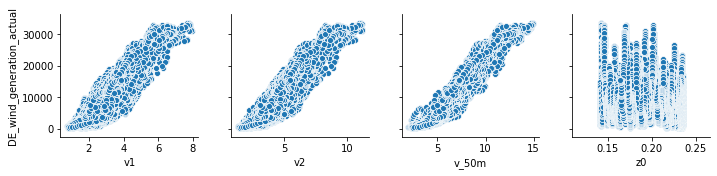

In [25]:
sns.pairplot(combined, x_vars=['v1', 'v2', 'v_50m', 'z0'], y_vars=['DE_wind_generation_actual'])


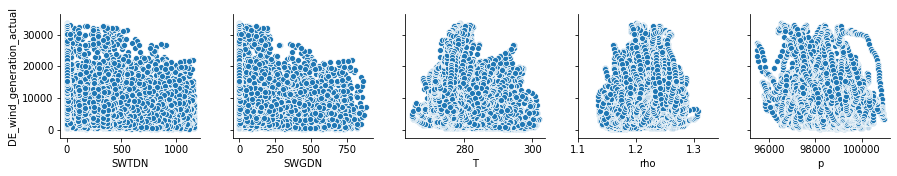

In [26]:
sns.pairplot(combined, x_vars=['SWTDN', 'SWGDN', 'T', 'rho', 'p'], y_vars=['DE_wind_generation_actual'])


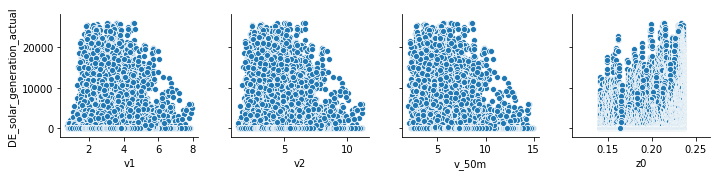

In [27]:
sns.pairplot(combined, x_vars=['v1', 'v2', 'v_50m', 'z0'], y_vars=['DE_solar_generation_actual'])


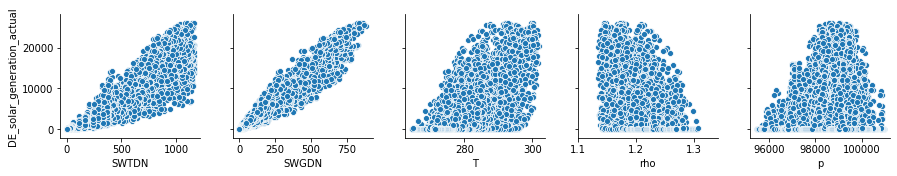

In [28]:
sns.pairplot(combined, x_vars=['SWTDN', 'SWGDN', 'T', 'rho', 'p'], y_vars=['DE_solar_generation_actual'])


In [1]:
pwd


'C:\\Users\\adamr'